In [2]:
import yfinance
import datetime
from dateutil.relativedelta import relativedelta
import ta
from ta.volatility import BollingerBands
from ta.momentum import RSIIndicator

In [3]:
import pandas as pd
from ta import add_all_ta_features
from ta.utils import dropna
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

In [4]:
start_date = datetime.datetime.now() - relativedelta(days=90)
end_date = datetime.datetime.now()

In [30]:
import yfinance as yf

msft = yf.Ticker("MSFT")

# get historical market data
hist = msft.history(period="max", start=start_date, end=end_date, interval='1d')

In [35]:
df = hist.copy()

In [36]:
indicator_bb = BollingerBands(close=df["Close"], window=20, window_dev=2, fillna=True)

# Add Bollinger Bands features
df['bb_bbm'] = indicator_bb.bollinger_mavg()
df['bb_bbh'] = indicator_bb.bollinger_hband()
df['bb_bbl'] = indicator_bb.bollinger_lband()

# Add Bollinger Band high indicator
df['bb_bbhi'] = indicator_bb.bollinger_hband_indicator()

# Add Bollinger Band low indicator
df['bb_bbli'] = indicator_bb.bollinger_lband_indicator()

# Add Width Size Bollinger Bands
df['bb_bbw'] = indicator_bb.bollinger_wband()

# Add Percentage Bollinger Bands
df['bb_bbp'] = indicator_bb.bollinger_pband()

In [37]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,bb_bbm,bb_bbh,bb_bbl,bb_bbhi,bb_bbli,bb_bbw,bb_bbp
Date,,,,,,,,,,,,,,
2020-11-16,214.308927,217.171444,213.959850,216.662766,24953300,0.00,0,216.662766,216.662766,216.662766,0.0,0.0,0.000000,0.000000
2020-11-17,215.535726,217.111587,213.520997,213.900009,24154100,0.00,0,215.281387,218.044144,212.518631,0.0,0.0,2.566647,0.250000
2020-11-18,213.649994,215.169998,210.929993,211.080002,28372800,0.56,0,213.880925,218.439313,209.322538,0.0,0.0,4.262547,0.192773
2020-11-19,211.380005,213.029999,209.929993,212.419998,24792700,0.00,0,213.515694,217.661161,209.370226,0.0,0.0,3.883057,0.367844
2020-11-20,212.199997,213.289993,210.000000,210.389999,22843100,0.00,0,212.890555,217.362769,208.418341,0.0,0.0,4.201421,0.220434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-08,243.149994,243.679993,240.809998,242.470001,22211900,0.00,0,229.030998,250.465393,207.596603,0.0,0.0,18.717462,0.813492
2021-02-09,241.869995,244.759995,241.380005,243.770004,23565000,0.00,0,230.344998,252.009154,208.680842,0.0,0.0,18.810181,0.809844
2021-02-10,245.000000,245.919998,240.889999,242.820007,22186700,0.00,0,231.739499,252.838262,210.640735,0.0,0.0,18.209035,0.762587


In [42]:
import uuid

In [46]:
 str(uuid.uuid4())[:6]

'f14f3f'

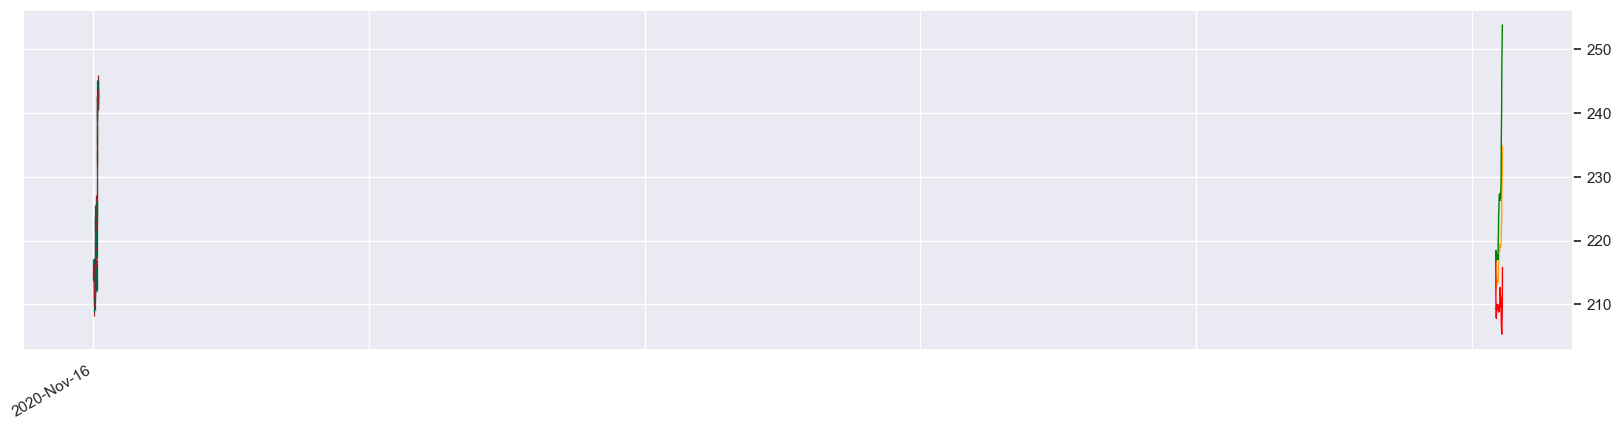

In [41]:
sns.set()

fig, ax = plt.subplots(figsize=(20, 5))

fplt.plot(df, type='candle', style='charles', ax=ax)
sns.lineplot(x=df.index, y=df['bb_bbm'], data=df, color='orange', linewidth=1, ax=ax)
sns.lineplot(x=df.index, y=df['bb_bbh'], data=df, color='green', linewidth=1, ax=ax)
sns.lineplot(x=df.index, y=df['bb_bbl'], data=df, color='red', linewidth=1, ax=ax)

ax.set_ylabel('')    
ax.set_xlabel('')

fig.autofmt_xdate()

plt.savefig('hello.png')

In [ ]:
df.iloc[-1].bb_bbhi.item()

# df = hist.copy()

In [50]:
indicator_rsi = RSIIndicator(close= df['Close'], window=21, fillna=True)

In [51]:
df['rsi'] = indicator_rsi.rsi()

In [52]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,bb_bbm,bb_bbh,bb_bbl,bb_bbhi,bb_bbli,bb_bbw,bb_bbp,rsi
Date,,,,,,,,,,,,,,,
2020-11-16,214.308927,217.171444,213.959850,216.662766,24953300,0.00,0,216.662766,216.662766,216.662766,0.0,0.0,0.000000,0.000000,100.000000
2020-11-17,215.535726,217.111587,213.520997,213.900009,24154100,0.00,0,215.281387,218.044144,212.518631,0.0,0.0,2.566647,0.250000,0.000000
2020-11-18,213.649994,215.169998,210.929993,211.080002,28372800,0.56,0,213.880925,218.439313,209.322538,0.0,0.0,4.262547,0.192773,0.000000
2020-11-19,211.380005,213.029999,209.929993,212.419998,24792700,0.00,0,213.515694,217.661161,209.370226,0.0,0.0,3.883057,0.367844,20.515531
2020-11-20,212.199997,213.289993,210.000000,210.389999,22843100,0.00,0,212.890555,217.362769,208.418341,0.0,0.0,4.201421,0.220434,15.467830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-08,243.149994,243.679993,240.809998,242.470001,22211900,0.00,0,229.030998,250.465393,207.596603,0.0,0.0,18.717462,0.813492,66.710205
2021-02-09,241.869995,244.759995,241.380005,243.770004,23565000,0.00,0,230.344998,252.009154,208.680842,0.0,0.0,18.810181,0.809844,67.592098
2021-02-10,245.000000,245.919998,240.889999,242.820007,22186700,0.00,0,231.739499,252.838262,210.640735,0.0,0.0,18.209035,0.762587,66.245530


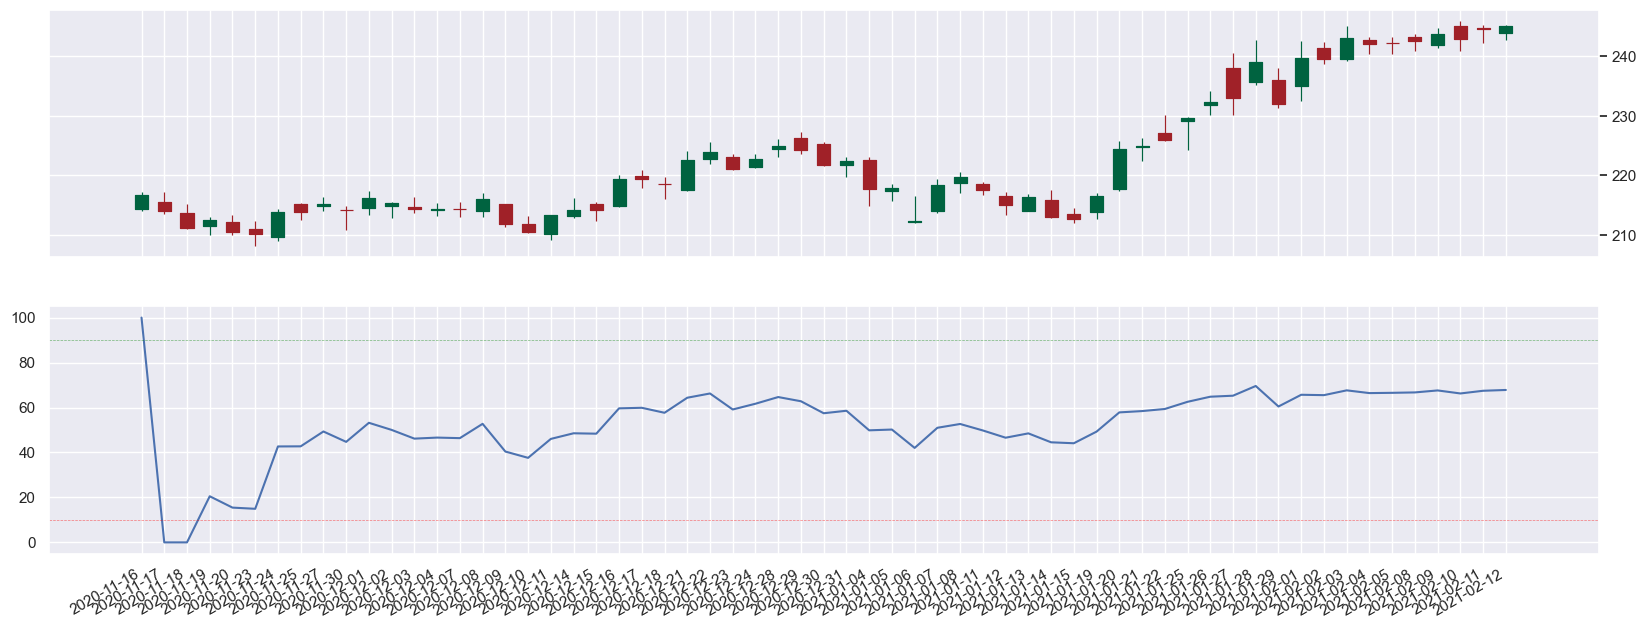

In [67]:
fig, ax = plt.subplots(figsize=(20, 8), nrows=2, sharex=True)

fplt.plot(df, type='candle', style='charles', ax=ax[0])
sns.lineplot(x=df.index.astype(str), y=df['rsi'], data=df, ax=ax[1], palette='blue')

ax[1].axhline(90, ls='--', linewidth=0.5, color='green', alpha=0.5)
ax[1].axhline(10, ls='--', linewidth=0.5, color='red', alpha=0.5)

ax[0].set_ylabel("")
ax[0].set_xlabel("")

ax[1].set_ylabel("")
ax[1].set_xlabel("")

fig.autofmt_xdate()
plt.show()

In [7]:
df = hist.copy()

In [8]:
indicator_macd = ta.trend.MACD(close= df['Close'],
                               window_slow = 26, 
                               window_fast = 12,
                               window_sign = 9,
                               fillna= True)

In [9]:
df['macd'] = indicator_macd.macd()
df['macd_diff'] = indicator_macd.macd_diff()
df['macd_signal'] = indicator_macd.macd_signal()

In [10]:
import numpy as np

In [11]:
colormat = np.where(df['macd_diff'] > 0, 'g', 'r')

In [13]:
import mplfinance as fplt

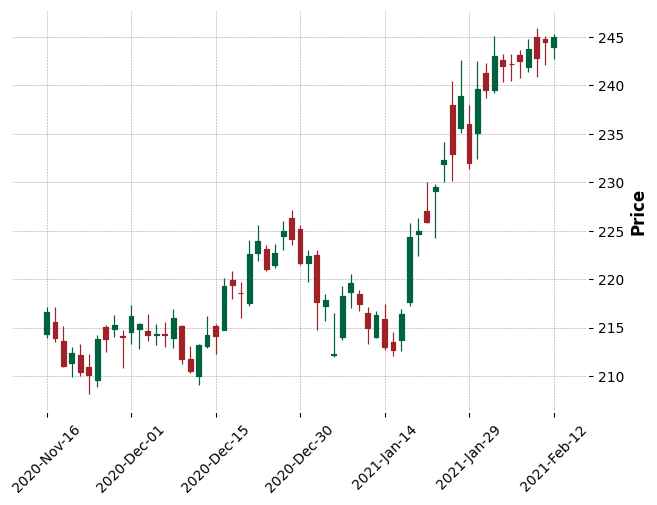

In [18]:
sns.set()


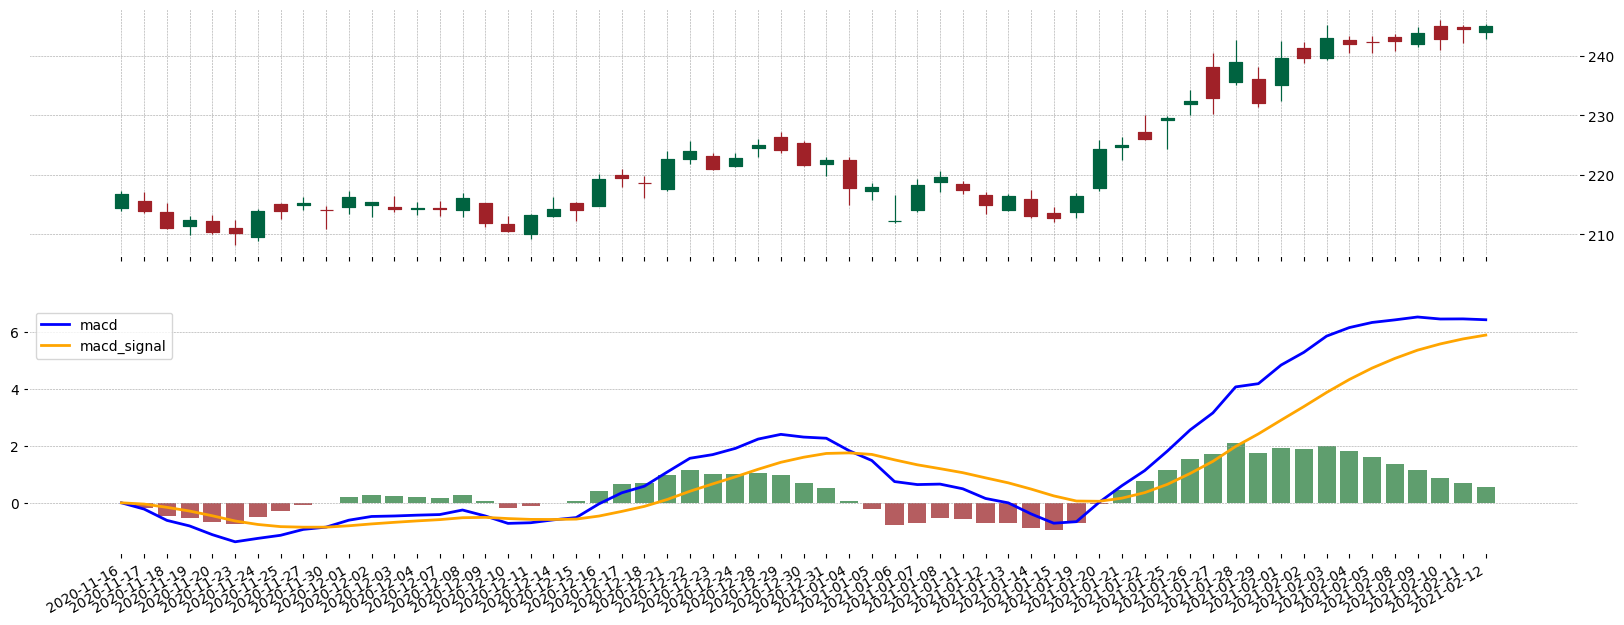

In [22]:
fig, ax = plt.subplots(figsize=(20, 8), nrows=2, sharex=True)

fplt.plot(df, type='candle', style='charles', ax=ax[0])
sns.barplot(x=df.index.astype(str), y=df['macd_diff'], data=df, ax=ax[1], palette=colormat)
sns.lineplot(x=df.index.astype(str), y=df['macd'], data=df, color='blue', ax=ax[1], label='macd')
sns.lineplot(x=df.index.astype(str), y=df['macd_signal'], data=df, color='orange', ax=ax[1], label='macd_signal')

ax[0].set_ylabel("")
ax[0].set_xlabel("")

ax[1].set_ylabel("")
ax[1].set_xlabel("")

ax[1].legend()

fig.autofmt_xdate()
plt.show()

In [ ]:
df

In [ ]:
d